<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumMatrixMultiplication_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-Aer

In [13]:
import numpy as np
from qiskit import QuantumCircuit, transpile, Aer, execute

In [14]:
# 입력 행렬 A와 B를 정의합니다 (예: 2x2 행렬)
A = np.array([[1, 2],
              [3, 4]])
B = np.array([[5, 6],
              [7, 8]])

# 결과 행렬 C를 초기화합니다 (0으로 채워진 2x2 행렬)
C = np.zeros((2, 2))

# 양자 회로를 생성합니다
qc = QuantumCircuit(2)

# A 행렬의 요소를 기반으로 X 게이트를 적용합니다
for i in range(2):
    for j in range(2):
        if A[i, j] == 1:
            qc.x(i)
        ###ㅑㄹ
    ###for
###for

# B 행렬의 요소를 기반으로 Controlled-X 게이트를 적용합니다
for i in range(2):
    for j in range(2):
        if B[i, j] == 1:
            qc.cx(0, 1)
        ###if
    ###for
###for
# 측정 게이트를 추가하여 결과를 얻습니다
qc.measure_all()


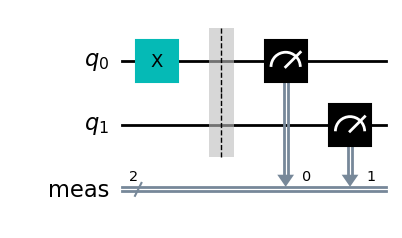

In [15]:
qc.draw('mpl')

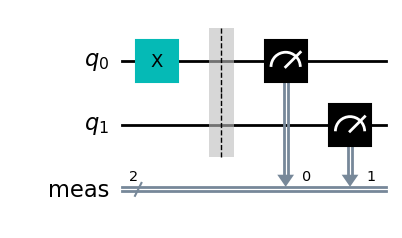

In [16]:
# 양자 회로를 시뮬레이션합니다
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl')


In [17]:
job = execute(transpiled_circuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()

In [18]:
# 결과 출력
for outcome, count in counts.items():
    decimal_outcome = int(outcome, 2)
    C[decimal_outcome // 2, decimal_outcome % 2] += count
###for

print("행렬 곱셈 결과 C:")
print(C)

행렬 곱셈 결과 C:
[[   0. 1024.]
 [   0.    0.]]
